# Sea Level Predictor Notebook

In [8]:
# Importamos los módulos necesarios
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [9]:
# Leemos los datos del archivo medical_data.csv y creamos nuestro dataframe
df = pd.read_csv('epa-sea-level.csv', sep=',')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


Text(0.5, 1.0, 'Rise in Sea Level')

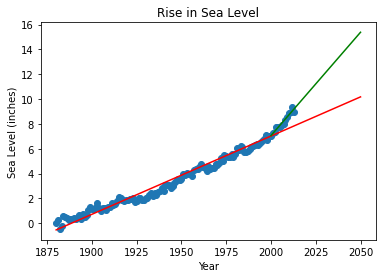

In [10]:
# 1. Generamos nuestro diagrama de dispersión para el nivel del mar a través de los años.
plt.scatter(x=df['Year'],y=df['CSIRO Adjusted Sea Level'])

#2.1Para predecir el nivel del mar en el año 2050, nos apoyamos en la regresión lineal (spicy.linregress) para intentar linealizar nuestro gráfico de dispersión. 
# De la cual nos interesa los valores de intercept y slope para formar nuestra recta 
# (y = intercept*x + slope)
res = linregress(x = df['Year'], y=df['CSIRO Adjusted Sea Level'])

# 2.2 Generamos una serie del rango entre el año inicial y el 2050.
years_series = pd.Series(range(1880,2051))

#2.3 Graficamos la primera aproximación lineal
plt.plot(years_series, res.intercept + res.slope * years_series, color = "red")


#3.1 Ahora vamos a intentar predecir el nivel del mar pero tomando solo como datos los valores del año 2000 en adelante. Por lo cual generamos un nuevo Dataframe.
df_from_2000s = df[df['Year']>=2000]

# 3.2 Generamos nuestra nueva función de regresión.
res_2 = linregress(df_from_2000s['Year'],df_from_2000s['CSIRO Adjusted Sea Level'])

#3.3 Ahora creamos una serie que incluya desde año 2000 al 2050.
years_series_2 = pd.Series(range(2000,2051))

# 3.3 Graficamos nuestra segunda aproximacoón lineal.
plt.plot(years_series_2, res_2.intercept + res_2.slope * years_series_2, color = "green")

#Finalmente agregamos el título del gráfico y de los ejes
plt.ylabel("Sea Level (inches)")
plt.xlabel("Year")
plt.title("Rise in Sea Level")